In [94]:
import pandas as pd
import numpy as np

In [95]:
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import model_selection

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter

In [97]:
names = ['x', 'y', 'class']
df = pd.read_csv("./demo_data/3.concertriccir2.csv", header = None, names = names)
df.head()

,x,y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [98]:
D = df.iloc[:, 0:2]
print(type(D))

<class 'pandas.core.frame.DataFrame'>


In [99]:
print(D.head())

          x         y
0  0.700335 -0.247068
1 -3.950019  2.740080
2  0.150222 -2.157638
3 -1.672050 -0.941519
4  2.560483 -1.846577


In [100]:
Y = df['class']
print(Y[:5])

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: class, dtype: float64


In [101]:
D_TRAIN, D_test, Y_TRAIN, Y_test = train_test_split(D, Y, test_size = 0.3, random_state = 0)

In [102]:
d_train, d_cv, y_train, y_cv = train_test_split(D_TRAIN, Y_TRAIN, test_size = 0.3)

In [103]:
neighbors = list()
neighbors = [idx for idx in range(1, 30, 2)]

for neighbor in neighbors:

    knn_clf = KNeighborsClassifier(n_neighbors = neighbor)
    knn_clf.fit(d_train, y_train)
    
    y_hat = knn_clf.predict(d_cv)
    
    score = accuracy_score(y_cv, y_hat)*100
    
    print("CV Accuracy for k {} : {}\n".format(neighbor, score))

CV Accuracy for k 1 : 79.04761904761905

CV Accuracy for k 3 : 80.95238095238095

CV Accuracy for k 5 : 82.85714285714286

CV Accuracy for k 7 : 78.0952380952381

CV Accuracy for k 9 : 79.04761904761905

CV Accuracy for k 11 : 79.04761904761905

CV Accuracy for k 13 : 79.04761904761905

CV Accuracy for k 15 : 80.95238095238095

CV Accuracy for k 17 : 78.0952380952381

CV Accuracy for k 19 : 76.19047619047619

CV Accuracy for k 21 : 75.23809523809524

CV Accuracy for k 23 : 75.23809523809524

CV Accuracy for k 25 : 74.28571428571429

CV Accuracy for k 27 : 73.33333333333333

CV Accuracy for k 29 : 70.47619047619048



In [104]:
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(d_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [105]:
Y_hat = clf.predict(D_test)
print(Y_hat)

[0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 1.]


In [106]:
#accuracy_score(y_cv, y_hat, normalize = True)
np.sum(np.array(Y_hat) == np.array(Y_test))/Y_hat.size

0.84

In [107]:
cv_scores = list()
#neighbors = [1, 3, 5]
for neighbor in neighbors:
    
    knn_clsfr = KNeighborsClassifier(n_neighbors = neighbor)
    
    scores = cross_val_score(knn_clsfr, d_train, y_train, cv =3, scoring = "accuracy")
    cv_scores.append(scores.mean())

print(cv_scores)

[0.898072869617585, 0.8694168423165713, 0.8489410820034126, 0.804075077787815, 0.795995182174044, 0.7509284352102781, 0.7469637659339557, 0.7306534176452875, 0.6939174947305028, 0.6817223727792833, 0.6531165311653117, 0.6490514905149052, 0.6409214092140921, 0.6367559971896015, 0.632640770852153]


#### Changing to missclassification error

In [108]:
mse = [1 - score for score in cv_scores]
print(mse)

[0.10192713038241497, 0.13058315768342865, 0.15105891799658744, 0.19592492221218505, 0.20400481782595603, 0.24907156478972192, 0.25303623406604425, 0.26934658235471254, 0.3060825052694972, 0.31827762722071673, 0.34688346883468835, 0.3509485094850948, 0.35907859078590787, 0.3632440028103985, 0.367359229147847]


#### Determining optimal k

In [109]:
min_mse = min(mse)

In [110]:
min_mse_idx = mse.index(min_mse)

In [111]:
optimal_k = neighbors[min_mse_idx]
print(optimal_k)

1


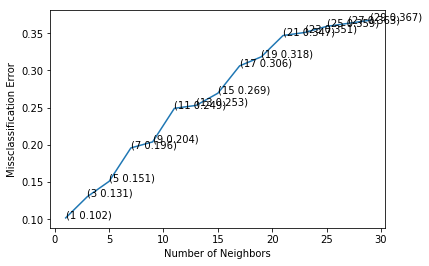

In [114]:
plt.plot(neighbors, mse)

for xy in zip(neighbors, np.round(mse, 3)):
    
    plt.annotate('(%s %s)' % xy, xy = xy, xycoords = "data")
    
plt.xlabel("Number of Neighbors")
plt.ylabel("Missclassification Error")
plt.show()